# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---

## Step 1: Dataset Exploration

Visualize the German Traffic Signs Dataset. This is open ended, some suggestions include: plotting traffic signs images, plotting the count of each sign, etc. Be creative!


The pickled data is a dictionary with 4 key/value pairs:

- features -> the images pixel values, (width, height, channels)
- labels -> the label of the traffic sign
- sizes -> the original width and height of the image, (width, height)
- coords -> coordinates of a bounding box around the sign in the image, (x1, y1, x2, y2). Based the original image (not the resized version).

In [1]:
import numpy as np
import tensorflow as tf
import time
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import os
%matplotlib inline

In [ ]:
# Load pickled data
import pickle

# TODO: fill this in based on where you saved the training and testing data
training_file = "traffic-sign-data/train.p"
testing_file = "traffic-sign-data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

In [ ]:
### To start off let's do a basic data summary.

# TODO: number of training exampbles
n_train = len(X_train)

# TODO: number of testing examples
n_test = len(X_test)

# TODO: what's the shape of an image?
image_shape = X_train[0].shape

# TODO: how many classes are in the dataset
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

In [ ]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.

# Import package
import matplotlib.pyplot as plt
%matplotlib inline

# Plot four sample images
print('Sample images')
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(X_train[i*1500+1])

In [ ]:
# Plot a histogram of the count of the number of examples of each sign
# in the test set

plt.hist(y_train, bins=n_classes)
plt.title('Number of examples of each sign in the test set')
plt.xlabel('Sign')
plt.ylabel('Count')
plt.plot()

In [ ]:
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

In [ ]:
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(X_train[i])

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Your model can be derived from a deep feedforward net or a deep convolutional network.
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [ ]:
# TODO: Preprocess data
# Not going to do any preprocessing for now. Get model working first.

In [ ]:
import cv2

In [ ]:
def grayscale(img):
    """Applies the Grayscale transform
    This will return an image with only one color channel
    but NOTE: to see the returned image as grayscale
    you should call plt.imshow(gray, cmap='gray')"""
    return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [ ]:
# Make images grayscale
X_train_gray = [grayscale(img) for img in X_train]
X_test_gray = [grayscale(img) for img in X_test]

In [ ]:
X_train[0].shape

In [ ]:
X_train_gray[0].shape

In [ ]:
plt.imshow(X_train_gray[0], cmap="gray")

In [ ]:
# Parameters
# TODO: Tune parameters
learning_rate = 0.2
training_epochs = 15
batch_size = 100
display_step = 1
dropout = 0.75

In [ ]:
# Network Parameters
n_classes = 43


# Multilayer perceptron only
n_hidden_1 = 256 # 1st layer number of features
n_hidden_2 = 256 # 2nd layer number of features
n_input = 3072 # Data input (img shape: 32*32*3)


In [ ]:
X_train.shape


In [ ]:
# tf Graph input
# CHANGE IF SWITCH TO GRAYSCALE OR COLOR
# x_unflattened = tf.placeholder("float", [None, 32, 32])
# Color version:
x_unflattened = tf.placeholder("float", [None, 32, 32, 3])
x = x_unflattened
# x = tf.reshape(x_unflattened, [-1, n_input])
# x = tf.placeholder("float", [None, n_input])

y_rawlabels = tf.placeholder("int32", [None])
y = tf.one_hot(y_rawlabels, depth=43, on_value = 1., off_value = 0., axis=-1)
# y = tf.placeholder("float", [None, n_classes])

In [ ]:
# Create model
def multilayer_perceptron(x, weights, biases):
    # Hidden layer with RELU activation
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_1 = tf.nn.relu(layer_1)
    # Hidden layer with RELU activation
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_2 = tf.nn.relu(layer_2)
    # Output layer with linear activation
    out_layer = tf.matmul(layer_2, weights['out']) + biases['out']
    return out_layer

# Store layers weight & bias
"""
weights = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_hidden_2, n_classes]))
}
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}
"""

In [ ]:
def conv2d(x, W, b, strides=1):
    # Conv2D wrapper, with bias and relu activation
    # strides = [batch, in_height, in_width, channels]
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding='SAME')
    x = tf.nn.bias_add(x, b)
    return tf.nn.relu(x)


def maxpool2d(x, k=2):
    # MaxPool2D wrapper
    return tf.nn.max_pool(x, ksize=[1, k, k, 1], strides=[1, k, k, 1],
                          padding='SAME')

In [ ]:
# Create model
def conv_net(x, weights, biases, dropout):
    # Reshape input picture
    # x = tf.reshape(x, shape=[-1, 32, 32, 3])
    # Convolution Layer
    conv1 = conv2d(x, weights['wc1'], biases['bc1'])
    # Max Pooling (down-sampling)
    conv1 = maxpool2d(conv1, k=2)

    # Convolution Layer
    conv2 = conv2d(conv1, weights['wc2'], biases['bc2'])
    # Max Pooling (down-sampling)
    conv2 = maxpool2d(conv2, k=2)

    # Fully connected layer
    # Reshape conv2 output to fit fully connected layer input
    fc1 = tf.reshape(conv2, [-1, weights['wd1'].get_shape().as_list()[0]])
    fc1 = tf.add(tf.matmul(fc1, weights['wd1']), biases['bd1'])
    fc1 = tf.nn.relu(fc1)
    # Apply Dropout
    fc1 = tf.nn.dropout(fc1, dropout)

    # Output, class prediction
    out = tf.add(tf.matmul(fc1, weights['out']), biases['out'])
    return out

# Store layers weight & bias
weights = {
    # 5x5 conv, 1 input, 32 outputs
    # CHANGE IF SWITCH TO GRAYSCALE OR COLOR
    'wc1': tf.Variable(tf.random_normal([5, 5, 3, 32])),
    # 5x5 conv, 32 inputs, 64 outputs
    'wc2': tf.Variable(tf.random_normal([5, 5, 32, 64])),
    # fully connected, 7*7*64 inputs, 1024 outputs
    'wd1': tf.Variable(tf.random_normal([4096, 1024])),
    # 1024 inputs, 10 outputs (class prediction)
    'out': tf.Variable(tf.random_normal([1024, n_classes]))
}

biases = {
    'bc1': tf.Variable(tf.random_normal([32])),
    'bc2': tf.Variable(tf.random_normal([64])),
    'bd1': tf.Variable(tf.random_normal([1024])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

In [ ]:
# Construct model
pred = conv_net(x, weights, biases, dropout)

# Define loss and optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(pred, y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# Initializing the variables
init = tf.initialize_all_variables()

In [58]:
# Launch the graph
with tf.Session() as sess:
    sess.run(init)
    
    # Initialise time logs
    init_time = time.time()
    epoch_time = init_time

    # Training cycle
    for epoch in range(training_epochs):
        avg_cost = 0.
        
        # _, c = sess.run([optimizer, cost], feed_dict={x: X_train_flat,
        #                                                  y: y_train})
        
        total_batch = int(n_train/batch_size)
        # Loop over all batches
        for i in range(total_batch):
            batch_x, batch_y = np.array(X_train_gray[i*batch_size:(i+1)*batch_size]), np.array(y_train[i*batch_size:(i+1)*batch_size])
            # tf.train.batch([X_train, y_train], batch_size=100, enqueue_many=True)
            # Run optimization op (backprop) and cost op (to get loss value)
            print(batch_y.shape)
            print(batch_x.shape)
            _, c = sess.run([optimizer, cost], feed_dict={x_unflattened: batch_x, y_rawlabels: batch_y})
            # Compute average loss
            avg_cost += c / total_batch
        # Display logs per epoch step
        if epoch % display_step == 0:
            print("Epoch:", '%04d' % (epoch+1), "cost=", \
                "{:.9f}".format(avg_cost))
            last_epoch_time = epoch_time
            epoch_time = time.time()
            print("Time since start: ", epoch_time - init_time)
            print("Time since last epoch: ", epoch_time - last_epoch_time)
        # Anneal learning rate
        if epoch % 5 == 0:
            learning_rate = learning_rate * 0.5
    print("Optimization Finished!")

    # Test model
    correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
    # Calculate accuracy
    accuracy_train = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    print("Accuracy (train):", accuracy.eval({x_unflattened: X_train_gray, y_rawlabels: y_train}))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    print("Accuracy (test):", accuracy.eval({x_unflattened: X_test_gray, y_rawlabels: y_test}))

(100,)
(100, 32, 32)


InvalidArgumentError: You must feed a value for placeholder tensor 'Placeholder_2' with dtype float
	 [[Node: Placeholder_2 = Placeholder[dtype=DT_FLOAT, shape=[], _device="/job:localhost/replica:0/task:0/cpu:0"]()]]
Caused by op 'Placeholder_2', defined at:
  File "/Users/jessica/anaconda/lib/python3.5/runpy.py", line 170, in _run_module_as_main
    "__main__", mod_spec)
  File "/Users/jessica/anaconda/lib/python3.5/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/Users/jessica/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "/Users/jessica/anaconda/lib/python3.5/site-packages/traitlets/config/application.py", line 596, in launch_instance
    app.start()
  File "/Users/jessica/anaconda/lib/python3.5/site-packages/ipykernel/kernelapp.py", line 442, in start
    ioloop.IOLoop.instance().start()
  File "/Users/jessica/anaconda/lib/python3.5/site-packages/zmq/eventloop/ioloop.py", line 162, in start
    super(ZMQIOLoop, self).start()
  File "/Users/jessica/anaconda/lib/python3.5/site-packages/tornado/ioloop.py", line 883, in start
    handler_func(fd_obj, events)
  File "/Users/jessica/anaconda/lib/python3.5/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/Users/jessica/anaconda/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/Users/jessica/anaconda/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/Users/jessica/anaconda/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/Users/jessica/anaconda/lib/python3.5/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/Users/jessica/anaconda/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 276, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/Users/jessica/anaconda/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 228, in dispatch_shell
    handler(stream, idents, msg)
  File "/Users/jessica/anaconda/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 391, in execute_request
    user_expressions, allow_stdin)
  File "/Users/jessica/anaconda/lib/python3.5/site-packages/ipykernel/ipkernel.py", line 199, in do_execute
    shell.run_cell(code, store_history=store_history, silent=silent)
  File "/Users/jessica/anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2723, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/Users/jessica/anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2825, in run_ast_nodes
    if self.run_code(code, result):
  File "/Users/jessica/anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2885, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-26-c0c084257a85>", line 2, in <module>
    x_unflattened = tf.placeholder("float", [None, 32, 32, 3])
  File "/Users/jessica/anaconda/lib/python3.5/site-packages/tensorflow/python/ops/array_ops.py", line 895, in placeholder
    name=name)
  File "/Users/jessica/anaconda/lib/python3.5/site-packages/tensorflow/python/ops/gen_array_ops.py", line 1238, in _placeholder
    name=name)
  File "/Users/jessica/anaconda/lib/python3.5/site-packages/tensorflow/python/ops/op_def_library.py", line 704, in apply_op
    op_def=op_def)
  File "/Users/jessica/anaconda/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 2260, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "/Users/jessica/anaconda/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 1230, in __init__
    self._traceback = _extract_stack()


Epoch: 0001 cost= 13427247.490975497


In [ ]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.

### Question 1 

_Describe the techniques used to preprocess the data._

**Answer:**
* Unsure as to whether or not to grayscale the data. Colours may be relevant. For example, a stop sign might be an upside-down red triangle.
* And should I canny?

In [ ]:
### Generate data additional (if you want to!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

### Question 2

_Describe how you set up the training, validation and testing data for your model. If you generated additional data, why?_

**Answer:**

* Training and test data were already separated (downloaded pickled files `train.p` and `test.p`).
* I **shuffled the training data** because they were arranged in ascending order by label. If I don't shuffle the training data, the first series of batches will all be the first type of sign followed by the second type and so on. This will distort the learning process.
* 

In [ ]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**



* My final architecture is a convolutional neural network. 
* It consists of two convolution layers.
* one fully connected layer, dropout.
* 

In [ ]:
### Train your model here.
### Feel free to use as many code cells as needed.

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

* Type of optimiser:
* Batch size: 100
* Epochs: 15
* 

### Question 5


_What approach did you take in coming up with a solution to this problem?_

**Answer:**

- I wanted to get a working model first. I started with a basic multilayer perceptron which I adapted from `TensorFlow-Examples`. I trained it for 15 epochs, which had an accuracy of 6% on the training and test sets. I then trained a two-layer convolutional neural network for 15 epochs which had an accuracy of 5-6% on the training and test sets. 
    - The accuracy was lower than I expected and the cost seemed high (of order 10^6 in the first epoch, 10^5 in the second and third and in the hundreds in the tenth epoch), so I adjusted parameters hoping to improve it before training for longer.
    - The cost reduced significantly (to single digits by the second epoch as opposed to order 10^5) after I added a small positive bias to the initial weights and biases. Strangely, the accuracy did not increase, but remained at 5-6%. The cost did not decrease significantly over the next 10 epochs either.
    - I went on Slack to see what results people were getting to get a feel for how wrong I was. I saw that people often trained their networks for hundreds of epochs so I thought it would be good to train my network for e.g. 100 epochs.
- I am currently waiting for access to GPUs to train my model for more epochs.

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It would be helpful to plot the images in the notebook._

**Answer:**

(Special characteristics of images arenoted in the comments)

In [2]:
# Helper function to read image copied from lane lines project
def read_image_and_print_dims(image_path):
    """Reads and returns image.
    Helper function to examine how an image is represented.
    """
    #reading in an image
    image = mpimg.imread(image_path)
    #printing out some stats and plotting
    print('This image is:', type(image), 'with dimensions:', image.shape)
    plt.imshow(image)  #call as plt.imshow(gray, cmap='gray') to show a grayscaled image
    return image

This image is: <class 'numpy.ndarray'> with dimensions: (314, 236, 3)


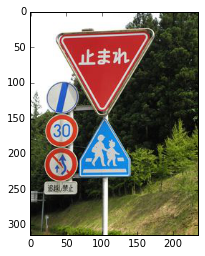

In [5]:
# This sign is not in English. It is a stop sign.
# There are multiple signs in the picture. 
# What wil the model attempt to recognise?
japanese_sign = read_image_and_print_dims('traffic-sign-data/japanese-sign.jpg')

This image is: <class 'numpy.ndarray'> with dimensions: (359, 478, 3)


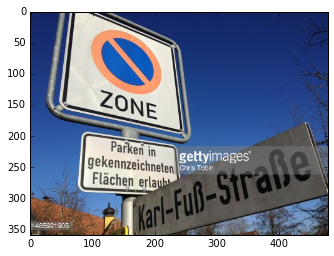

In [9]:
# There is other intervening text in the image.
# This sign is shown at an angle.
german_sign = read_image_and_print_dims('traffic-sign-data/german-sign.jpg')

This image is: <class 'numpy.ndarray'> with dimensions: (401, 350, 3)


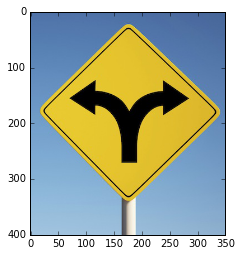

In [8]:
# This sign is quite clear.
two_way_sign = read_image_and_print_dims('traffic-sign-data/two-way-sign.jpg')

This image is: <class 'numpy.ndarray'> with dimensions: (1067, 1600, 3)


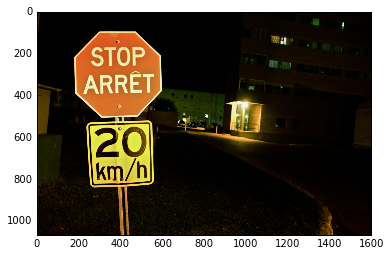

In [11]:
# Can the model recognise the 20 km/h sign as a speed limit sign
# even though it has different background colour, different shape
# and additional 'km/h' text?
speed_limit_stop = read_image_and_print_dims('traffic-sign-data/speed-limit-stop.JPG')

This image is: <class 'numpy.ndarray'> with dimensions: (1298, 1300, 3)


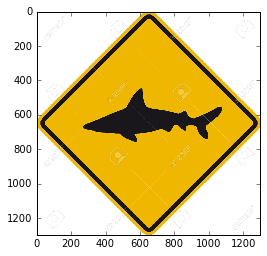

In [12]:
# What will the model think this is?
shark_sign = read_image_and_print_dims('traffic-sign-data/shark-sign.jpg')

In [ ]:
### Run the predictions here.
### Feel free to use as many code cells as needed.

### Question 7

_Is your model able to perform equally well on captured pictures or a live camera stream when compared to testing on the dataset?_


**Answer:**

My guess would be no because
1. Live camera stream is not limited to 32 x 32 images.
2. 

In [ ]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.11/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*


**Answer:**

### Question 9
_If necessary, provide documentation for how an interface was built for your model to load and classify newly-acquired images._


**Answer:**
Not applicable at the moment.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.